In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df=pd.read_csv(r"AirPassengers (3).csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.shape

(144, 2)

In [7]:
df["Month"]=pd.to_datetime(df["Month"])
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df=df.set_index("Month")

In [10]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

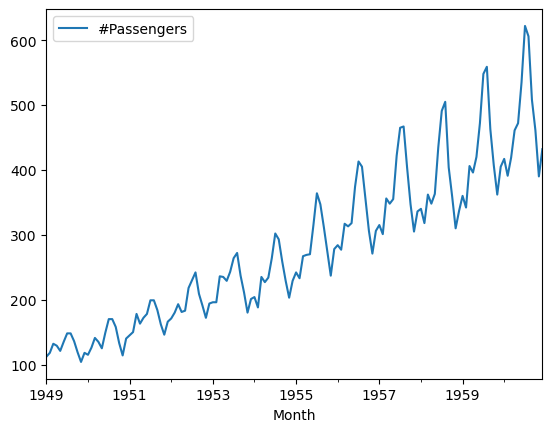

In [11]:
df.plot()

# SIMPLE MOVING AVERAGE

In [13]:
df["Passengers:10 rolling"]=df["#Passengers"].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Month'>

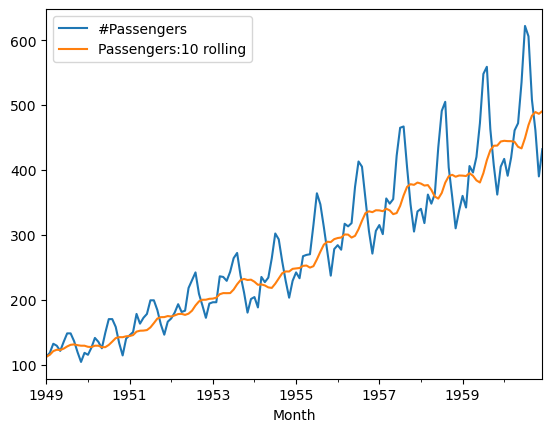

In [14]:
df[["#Passengers","Passengers:10 rolling"]].plot()

In [15]:
df["Passengers:30 rolling"]=df["#Passengers"].rolling(window=30,min_periods=1).mean()

<AxesSubplot:xlabel='Month'>

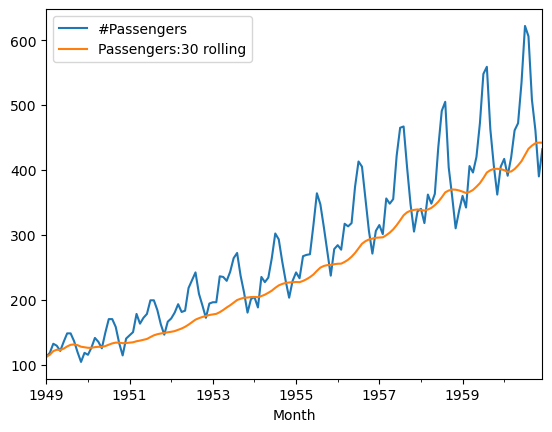

In [16]:
df[["#Passengers","Passengers:30 rolling"]].plot()

In [17]:
df["Passengers:50 rolling"]=df["#Passengers"].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Month'>

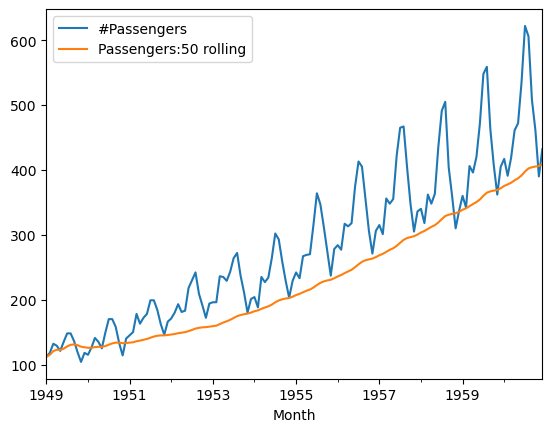

In [18]:
df[["#Passengers","Passengers:50 rolling"]].plot()

<AxesSubplot:xlabel='Month'>

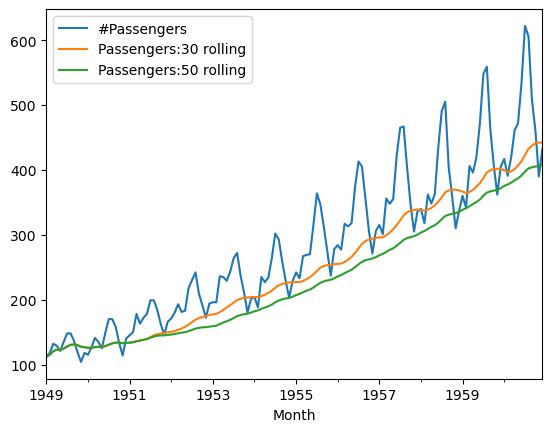

In [19]:
df[["#Passengers","Passengers:30 rolling","Passengers:50 rolling"]].plot()

# EXPONENTIAL MOVING AVERAGE

In [34]:
df["Passengers:EVM_0.1"]=df["#Passengers"].ewm(alpha=0.1,adjust=True,min_periods=1).mean()

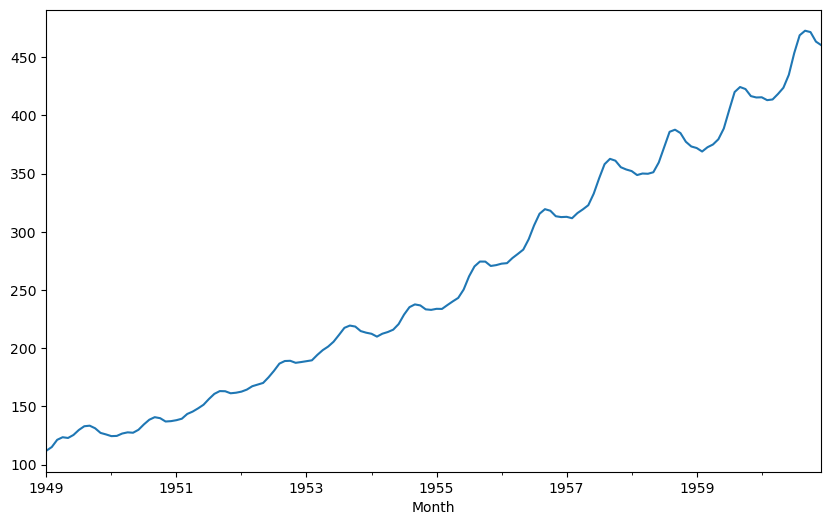

In [35]:
df["Passengers:EVM_0.1"]=df["#Passengers"].ewm(alpha=0.1,adjust=True,min_periods=1).mean().plot(figsize=(10,6))

In [40]:
df["Passengers:EMA_5DAYS"]=df["#Passengers"].ewm(span=50).mean()


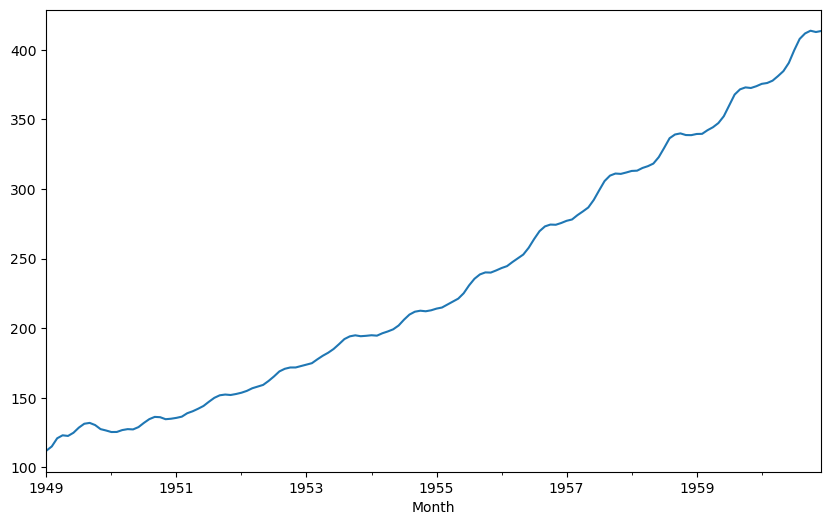

In [37]:
df["Passengers:EMA_5DAYS"]=df["#Passengers"].ewm(span=50).mean().plot(figsize=(10,6))